In [1]:
import numpy as np
import matplotlib.pyplot as plt
import platform
import pandas as pd

In [2]:
n = 15000
t_final = 50
dt = t_final / n
#
#  Initial conditions.
#
t = np.linspace ( 0.0, t_final, n + 1 )

x = np.zeros ( n + 1 )
y = np.zeros ( n + 1 )
z = np.zeros ( n + 1 )
w = np.zeros ( n + 1 )
k = np.zeros ( n + 1 )
m = np.zeros ( n + 1 )

x[0] = 0.0 #Q11
y[0] = 0.0 #Q12
z[0] = 0.0 #Q13
w[0] = 0.0 #Q22
k[0] = 0.0 #Q23
m[0] = 0.0 #Q33

SHEAR1 = 0.4*(0.138 * np.sin(0.5*t) + 0.138*np.cos(0.5*t))
SHEAR2 = 0.4*(0.227 * np.sin(0.5*t) + 0.232*np.cos(0.5*t))
SHEAR3 = 0.4*(0.0909 * np.sin(0.5*t) + 0.0778*np.cos(0.5*t))
SHEAR4 = 0.4*(0.0779 * np.sin(0.5*t) + 0.05*np.cos(0.5*t))
SHEAR5 = 0.4*(0.0477 * np.sin(0.5*t) + 0.0648*np.cos(0.5*t))

SHEAR02 = 0.4*(0.0589)*np.sin(0.5*t) + 0.0845*np.cos(0.5*t)
SHEAR05 = 0.4*(0.114 * np.sin(0.5*t) + 0.15*np.cos(0.5*t))

In [3]:
beta =170
phi = 0.005
Dea = 1
xi = 1
Wi = 0.2
De = 0.5
lamb = 0.35
eta = 0.01

In [4]:
    def rk4vec ( t0, m, u0, dt, f ):
        f0 = f ( t0, m, u0 )
        t1 = t0 + dt / 2.0
        u1 = u0 + dt * f0 / 2.0
        f1 = f ( t1, m, u1 )

        t2 = t0 + dt / 2.0
        u2 = u0 + dt * f1 / 2.0
        f2 = f ( t2, m, u2 )
    
        t3 = t0 + dt
        u3 = u0 + dt * f2
        f3 = f ( t1, m, u1 )

        u = u0 + dt * ( f0 + 2.0 * f1 + 2.0 * f2 + f3 ) / 6.0

        return u
    
    def lorenz_rhs ( t, m, xyz ):
    
        dxdt = np.zeros ( 6 )
        dxdt[0] = beta * phi * (- Dea*xyz[0] + (2 - xi) * Wi * np.cos(De * t) * xyz[1])                                    #q11
        dxdt[1] = beta * phi * (- Dea*xyz[1] + Wi * np.cos(De * t)*(xyz[3] - xi/2* xyz[0] - xi/2*xyz[3] + lamb/2) + (2* eta * Wi* np.cos(De * t))) #q12
        dxdt[2] = beta * phi * (- Dea*xyz[2] + (1 - xi) * Wi * np.cos(De * t) * xyz[4])                                       #q13
        dxdt[3] = beta * phi * (- Dea* xyz[3] - xi * Wi * np.cos(De * t) * xyz[1])                            #q22
        dxdt[4] = beta * phi * (- Dea* xyz[4] - xi * Wi * np.cos(De * t) * xyz[2])                            #q23
        dxdt[5] = beta * phi * (- Dea* xyz[5])                             #q33

    # Q11 - 0, Q12 - 1, Q13 - 2, Q22 - 3, Q23 - 4, Q33 - 5
        return dxdt

In [5]:
for j in range ( 0, n ):

                    xyz = np.array ( [ x[j], y[j], z[j], w[j] , k[j] , m[j]  ] )
                    xyz = rk4vec ( t[j], 3, xyz, dt, lorenz_rhs )
    
 #   xyz2 = np.array ( [ x2[j], y2[j], z2[j], w2[j] , k2[j] , m2[j]  ] )
 #   xyz2 = rk4vec ( t[j], 3, xyz2, dt, lorenz_rhs2 )

                    x[j+1] = xyz[0]
                    y[j+1] = xyz[1]
                    z[j+1] = xyz[2]
                    w[j+1] = xyz[3]
                    k[j+1] = xyz[4]
                    m[j+1] = xyz[5]


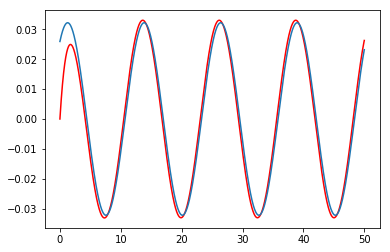

In [6]:
plt.plot(t,y,color='r')
plt.plot(t,SHEAR5)
#plt.plot(t,SHEAR2)

In [7]:
frac01 = pd.read_csv('frac01.csv',sep=',') 
frac01.rename(columns={'Unnamed: 0': 't', 'Unnamed: 1': 'exp', 'Unnamed: 2': 'model'}, inplace=True)
frac02 = pd.read_csv('frac02.csv',sep=',') 
frac02.rename(columns={'Unnamed: 0': 't', 'Unnamed: 1': 'exp', 'Unnamed: 2': 'model'}, inplace=True)
frac03 = pd.read_csv('frac03.csv',sep=',') 
frac03.rename(columns={'Unnamed: 0': 't', 'Unnamed: 1': 'exp', 'Unnamed: 2': 'model'}, inplace=True)
frac04 = pd.read_csv('frac04.csv',sep=',') 
frac04.rename(columns={'Unnamed: 0': 't', 'Unnamed: 1': 'exp', 'Unnamed: 2': 'model'}, inplace=True)
frac05 = pd.read_csv('frac05.csv',sep=',') 
frac05.rename(columns={'Unnamed: 0': 't', 'Unnamed: 1': 'exp', 'Unnamed: 2': 'model'}, inplace=True)

In [8]:
frac01.head()

,t,exp,model
0,0.000000,0.055200,0.000000
1,0.003333,0.055292,0.000197
2,0.006667,0.055384,0.000393
3,0.010000,0.055475,0.000589
4,0.013333,0.055567,0.000785


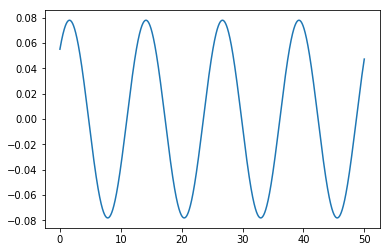

In [9]:
plt.plot(frac01['t'],frac01['exp'])

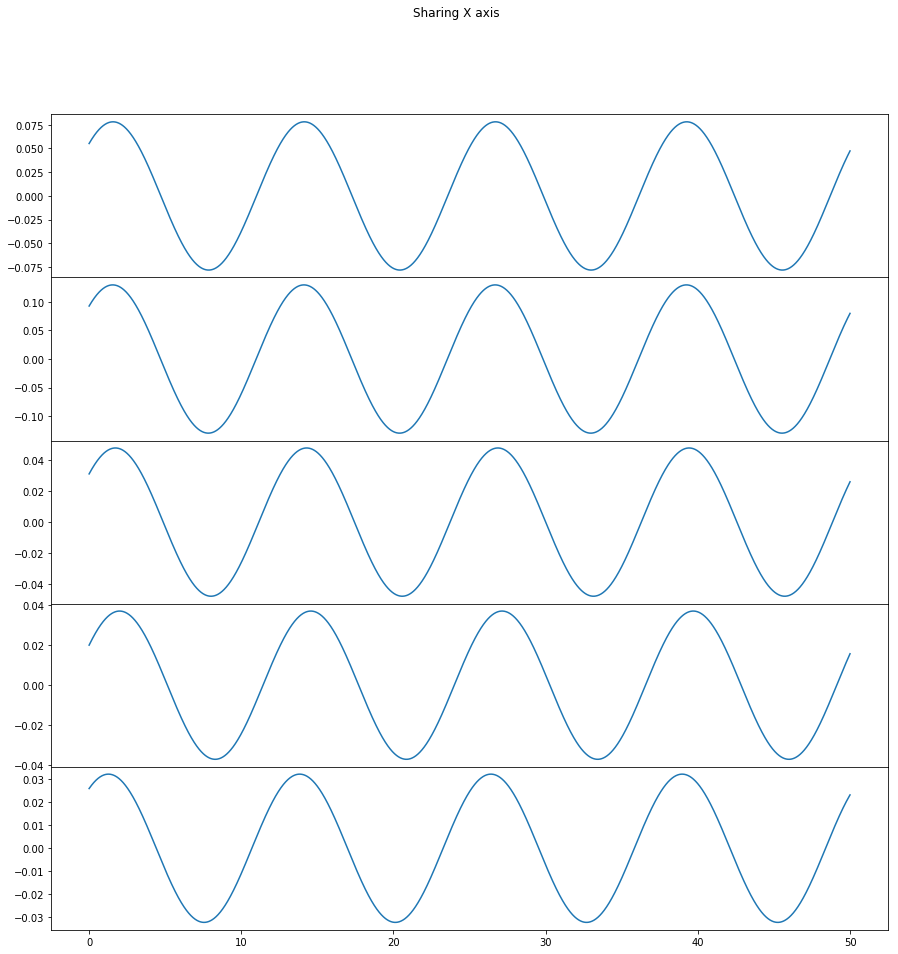

In [10]:

f, axarr = plt.subplots(5, figsize=(15,15),sharex=True)
f.suptitle('Sharing X axis')
axarr[0].plot(frac01['t'], frac01['exp'])
axarr[1].plot(frac01['t'], frac02['exp'])
axarr[2].plot(frac01['t'], frac03['exp'])
axarr[3].plot(frac01['t'], frac04['exp'])
axarr[4].plot(frac01['t'], frac05['exp'])
f.subplots_adjust(hspace=0)
# Hide x labels and tick labels for all but bottom plot.
for ax in axarr:
    ax.label_outer()



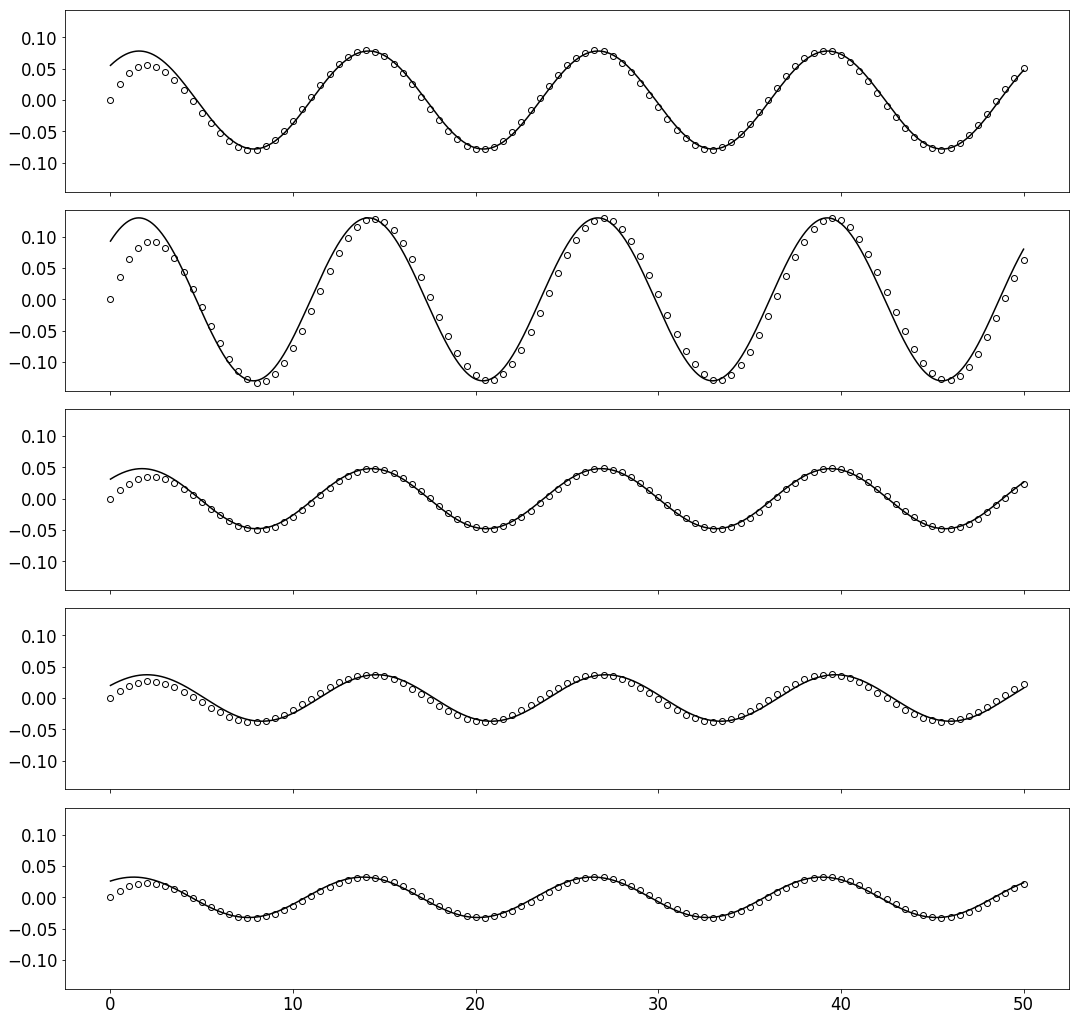

In [16]:
import matplotlib.ticker as ticker
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,  figsize=(18,18), sharex=True, sharey=True)
tick_spacing = 0.05
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))


ax1.plot(frac01['t'], frac01['exp'],color='k')
ax1.plot(frac01['t'], frac01['model'],marker='o',markevery=150,linestyle=' ',color='k',markeredgecolor='k',markerfacecolor='None')
ax1.tick_params(labelsize=16.5)

ax2.plot(frac01['t'], frac02['exp'],color='k')
ax2.plot(frac01['t'], frac02['model'],marker='o',markevery=150,linestyle=' ',color='k',markeredgecolor='k',markerfacecolor='None')
ax2.tick_params(labelsize=16.5)

ax3.plot(frac01['t'], frac03['exp'],color='k')
ax3.plot(frac01['t'], frac03['model'],marker='o',markevery=150,linestyle=' ',color='k',markeredgecolor='k',markerfacecolor='None')
ax3.tick_params(labelsize=16.5)

ax4.plot(frac01['t'], frac04['exp'],color='k')
ax4.plot(frac01['t'], frac04['model'],marker='o',markevery=150,linestyle=' ',color='k',markeredgecolor='k',markerfacecolor='None')
ax4.tick_params(labelsize=16.5)

ax5.plot(frac01['t'], frac05['exp'],color='k')
ax5.plot(frac01['t'], frac05['model'],marker='o',markevery=150,linestyle=' ',color='k',markeredgecolor='k',markerfacecolor='None')
ax5.tick_params(labelsize=16.5)
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0.1)
#ax1.grid()
#ax2.grid()
#ax3.grid()
#ax4.grid()
#ax5.grid()
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

In [18]:
eta1 = 1 - np.exp(-170*0.005/(1 - 0.005/0.01))
eta2 = 1 + 10*0.006 + 2500*0.006**2
eta1

0.8173164759472653

In [19]:
eta1 = 1 - np.exp(-390*0.002/(1 - 0.002/0.01)) --- 0.622807646436843 com lambda 1
eta1 = 1 - np.exp(-200*0.003/(1 - 0.003/0.005)) --- 0.57562715432305 com lambda 0.6
eta1 = 1 - np.exp(-80*0.004/(1 - 0.004/0.01)) ---- 0.4133537804899682 com lambda 0.65



SyntaxError: invalid syntax (<ipython-input-19-182d71cb381f>, line 1)

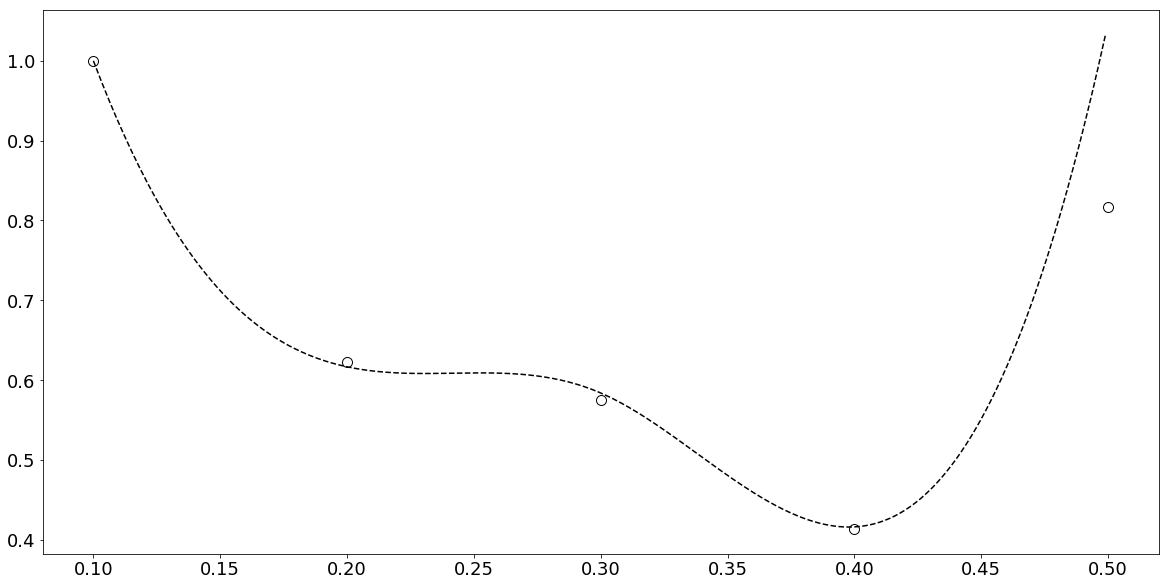

In [25]:
import numpy as np
from scipy.interpolate import interp1d
eta_exp = [1,0.6167, 0.5839, 0.4161, 1.047]
eta_model = [1,0.622807646436843 , 0.57562715432305, 0.4133537804899682, 0.8173164759472653]
frac = [0.1,0.2,0.3,0.4,0.5]
xnew = np.linspace(0.1, 0.5, num=41, endpoint=True)
f2 = interp1d(frac, eta_exp, kind='cubic')

tck = interpolate.splrep(frac, eta_exp, s=0)
xnew = np.arange(0.1, 0.5, 0.001)
ynew = interpolate.splev(xnew, tck, der=0)

plt.figure(figsize=(20,10))
plt.plot(xnew, f2(xnew),color='k',linestyle='--')
plt.tick_params(labelsize=18)
plt.plot(frac,eta_model,marker='o',markersize=10,linestyle=' ',color='k',markeredgecolor='k',markerfacecolor='None')